In [2]:
# !pip install statsmodels

In [11]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/real_estate_model_ready.csv')
print(df.shape)
df.head()

(199, 33)


,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned,Price by sub-area,Amenities score,Price by Amenities score,Noun_Counts,Verb_Counts,Adjective_Counts,boasts elegant,elegant towers,every day,great community,mantra gold,offering bedroom,quality specification,stories offering,towers stories,world class
0,pune,maharashtra,india,1.0,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located suburbs ba...,1,1,1,1,1,1,1,670.0,51.5,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
1,pune,maharashtra,india,2.0,bavdhan,shapoorji paloonji,vanaha,vanaha township located near lonavala hill ran...,1,1,1,1,1,1,1,774.0,65.0,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
2,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha society suitable aged group people play...,1,1,1,1,1,1,1,889.0,74.0,62.897000,7,74.75,9,1,3,0,0,0,0,0,0,0,0,0,0
3,pune,maharashtra,india,3.0,bavdhan,shapoorji paloonji,vanaha,vanaha township offering bhk grand prpoerties ...,1,1,1,1,1,1,1,1018.0,89.0,62.897000,7,74.75,8,1,3,0,0,0,0,0,0,0,0,0,0
4,pune,maharashtra,india,2.0,mahalunge,godrej properties,godrej hills retreat,area hub prestigious schools like bishop high ...,1,1,1,1,1,1,1,743.0,74.0,74.833333,7,74.75,12,1,6,0,0,0,0,0,0,0,0,0,0


In [8]:
# Selecting only numerical features
cols_to_drop = ['City','State','Country','Sub-Area Cleaned','TownShip Name/ Society Name Cleaned',
                'Description Cleaned','Company Name Cleaned']

features = df.drop(cols_to_drop,axis=1).columns.tolist()
print("Final number of features: "+str(len(features)))

Final number of features: 26


In [79]:
# IDV and DV
X = df[features].drop('Price in lakhs Cleaned',axis=1)
y = df[['Price in lakhs Cleaned']]

# adding constant for modeling
X_sm = sm.add_constant(X)

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X_sm,y,test_size=0.3,random_state=1234)
print((x_train.shape, x_test.shape), (y_train.shape,y_test.shape))

(199, 25)
(199, 1)
((139, 26), (60, 26)) ((139, 1), (60, 1))


In [80]:
lr = sm.OLS(y_train,x_train).fit()

In [81]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Price in lakhs Cleaned   R-squared:                       0.860
Model:                                OLS   Adj. R-squared:                  0.839
Method:                     Least Squares   F-statistic:                     40.99
Date:                    Mon, 04 Jul 2022   Prob (F-statistic):           1.27e-42
Time:                            19:19:50   Log-Likelihood:                -582.83
No. Observations:                     139   AIC:                             1204.
Df Residuals:                         120   BIC:                             1259.
Df Model:                              18                                         
Covariance Type:                nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    -104.8644     22.230     -4.717      0.000    -148.878     -60.851
Property Type Cleaned                       8.3943      3.079      2.727      0.007       2.299      14.490
ClubHouse Cleaned                         -17.6386      5.054     -3.490      0.001     -27.646      -7.631
School / University in Township Cleaned     2.8619      3.438      0.832      0.407      -3.945       9.669
Hospital in TownShip Cleaned                2.8619      3.438      0.832      0.407      -3.945       9.669
Mall in TownShip Cleaned                    2.8619      3.438      0.832      0.407      -3.945       9.669
Park / Jogging track Cleaned               20.6928     15.682      1.320      0.189     -10.356      51.741
Swimming Pool Cleaned                      -7.7940      5.165     -1.509      0.134     -18.021       2.433
Gym Cleaned                                -1.6192      4.667     -0.347      0.729     -10.859       7.621
Property Area in Sq. Ft. Cleaned            0.0816      0.010      8.349      0.000       0.062       0.101
Price by sub-area                           0.4216      0.061      6.876      0.000       0.300       0.543
Amenities score                             2.2267      2.478      0.899      0.371      -2.679       7.132
Price by Amenities score                    0.5656      0.199      2.842      0.005       0.172       0.960
Noun_Counts                                -0.3835      0.494     -0.776      0.439      -1.361       0.595
Verb_Counts                                -1.9065      1.392     -1.370      0.173      -4.663       0.849
Adjective_Counts                            2.2681      0.841      2.696      0.008       0.603       3.934
boasts elegant                             -5.5925      5.954     -0.939      0.349     -17.381       6.196
elegant towers                             -5.5925      5.954     -0.939      0.349     -17.381       6.196
every day                                   4.7800      6.632      0.721      0.472      -8.350      17.910
great community                             1.7111      9.954      0.172      0.864     -17.997      21.419
mantra gold                                -9.1628      7.563     -1.211      0.228     -24.138       5.812
offering bedroom                           18.1809     15.768      1.153      0.251     -13.039      49.401
quality specification                       1.7111      9.954      0.172      0.864     -17.997      21.419
stories offering                           -5.5925      5.954     -0.939      0.349     -17.381       6.196
towers stories                             -5.5925      5.954     -0.939      0.349     -17.381       6.196
world class    

In [82]:
preds_lr = lr.predict(x_test)
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test,preds_lr)))

12.942632445045955


In [83]:
# lr.conf_int_el(0)

In [84]:
preds_lr = lr.get_prediction(x_test)

In [85]:
preds_lr.predicted_mean

array([ 94.17080552, 100.99941895,  82.63178691, 124.00741477,
        65.71963691,  90.42541857,  88.43531882, 108.69952847,
        50.21350084,  55.70478694,  83.80729815,  54.25417468,
       118.37076069, 173.30048505,  73.18946242,  44.29266532,
       103.70654727,  72.09595102,  50.93143992,  78.92439063,
        48.0534305 , 114.31721186,  74.75715439,  56.94041785,
       152.73588395,  53.79825942, 111.57055869, 133.42614299,
        47.13674172,  77.39886289,  77.45224114,  45.63960896,
        64.1645221 , 116.59733983,  75.20552358,  60.89128434,
       159.82242385, 182.05982469,  87.84821238,  59.2446386 ,
        72.52994352, 106.78605256,  55.01556345,  88.8206305 ,
        60.12039003,  44.72901446,  53.17237304, 101.92507344,
       127.73151917,  89.09906293,  80.34340933, 180.57744906,
        67.59911001,  46.40523442, 185.32786633, 102.33062832,
        80.08319482, 128.13073946,  72.2281903 ,  89.32994266])

In [86]:
preds_lr.conf_int()

array([[ 82.87767106, 105.46393998],
       [ 84.86243866, 117.13639924],
       [ 69.27276066,  95.99081317],
       [107.15248902, 140.86234052],
       [ 53.24372946,  78.19554436],
       [ 71.05950796, 109.79132917],
       [ 71.0134579 , 105.85717974],
       [ 90.76237668, 126.63668026],
       [ 39.68143123,  60.74557046],
       [ 47.2685067 ,  64.14106718],
       [ 74.76966692,  92.84492938],
       [ 19.29865922,  89.20969014],
       [109.84477902, 126.89674235],
       [158.80600119, 187.79496892],
       [ 62.73111861,  83.64780623],
       [ 34.25474561,  54.33058504],
       [ 96.67319879, 110.73989574],
       [ 58.46506939,  85.72683265],
       [ 41.938596  ,  59.92428385],
       [ 66.3851983 ,  91.46358296],
       [ 13.53826268,  82.56859832],
       [104.15479959, 124.47962414],
       [ 59.7940316 ,  89.72027718],
       [ 44.67234316,  69.20849255],
       [144.80067882, 160.67108908],
       [ 45.89175656,  61.70476228],
       [105.21473853, 117.92637886],
 

In [90]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(lr,x_test)

In [93]:
iv_u

array([130.13600087, 138.76663387, 119.29817442, 162.08692254,
       102.07357283, 129.6809772 , 126.76913716, 147.27026614,
        85.94702685,  90.87766306, 119.12923423, 103.11979093,
       153.5652596 , 210.39563909, 108.90132803,  79.88367855,
       138.5695417 , 108.86225794,  86.24194307, 115.30009316,
        96.60502367, 149.94353659, 112.03791932,  93.22355508,
       187.79195148,  88.84784113, 146.30320674, 168.14183672,
        83.15119669, 112.51555403, 115.66364255,  81.61611669,
        99.74357374, 152.2128232 , 110.38620812,  95.87483899,
       195.01380403, 219.40857957, 123.80915967,  98.16264705,
       107.41564978, 143.26908546,  93.21791796, 124.25057803,
        95.8879063 ,  79.88484905,  89.82862986, 138.9424197 ,
       162.9892683 , 123.70429382, 116.75725816, 218.07276955,
       105.02849789,  95.11615271, 221.007166  , 138.27430191,
       115.36062478, 163.54586645, 107.03512866, 125.8848133 ])

## Regularized Models:

In [94]:
lr_reg = sm.OLS(y_train,x_train).fit_regularized()

In [95]:
# lr_reg.summary()

In [96]:
lr_reg.params

const                                      47.872536
Property Type Cleaned                      20.209183
ClubHouse Cleaned                          25.754341
School / University in Township Cleaned    70.596191
Hospital in TownShip Cleaned                0.000000
Mall in TownShip Cleaned                    0.000000
Park / Jogging track Cleaned              -39.642351
Swimming Pool Cleaned                      30.948932
Gym Cleaned                                24.577401
Property Area in Sq. Ft. Cleaned            0.048126
Price by sub-area                           0.353755
Amenities score                           -25.421819
Price by Amenities score                   -0.192196
Noun_Counts                                -0.367201
Verb_Counts                                -2.182754
Adjective_Counts                            0.457017
boasts elegant                             11.624647
elegant towers                              0.000000
every day                                  11.

In [97]:
preds_reg = lr_reg.predict(x_test)

In [98]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test,preds_reg)))

26.00280867568004


In [100]:
preds_reg[:5]

196     96.885284
159    107.755436
31      89.659685
48     138.968706
63      88.919656
dtype: float64

In [102]:
# from statsmodels.sandbox.regression.predstd import wls_prediction_std
# prstd, iv_l, iv_u = wls_prediction_std(lr_reg,x_test)

In [103]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [104]:
# IDV and DV
X = df[features].drop('Price in lakhs Cleaned',axis=1)
y = df[['Price in lakhs Cleaned']]

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)
print((x_train.shape, x_test.shape), (y_train.shape,y_test.shape))

(199, 25)
(199, 1)
((139, 25), (60, 25)) ((139, 1), (60, 1))


In [105]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8601049466092403

In [110]:
preds_lr = lr.predict(x_test)
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test,preds_lr)))

12.942632445045726


In [121]:
stdev = np.sqrt(np.sum((lr.predict(x_train) - y_train)**2) / (len(y_train) - 1))
stdev

Price in lakhs Cleaned    16.082111
dtype: float64

In [122]:
# (prediction - 1.96*stdev, prediction + 1.96*stdev)

lower = (preds_lr - 1.96*stdev.values)
upper = (preds_lr + 1.96*stdev.values)

In [123]:
lower[:5]

array([[62.64986811],
       [69.47848153],
       [51.1108495 ],
       [92.48647735],
       [34.19869949]])

In [124]:
upper[:5]

array([[125.69174294],
       [132.52035636],
       [114.15272433],
       [155.52835218],
       [ 97.24057432]])

In [118]:
preds_lr[:5]

array([[ 94.17080552],
       [100.99941895],
       [ 82.63178691],
       [124.00741477],
       [ 65.71963691]])

In [119]:
y_test[:5]

,Price in lakhs Cleaned
196,95.00
159,92.00
31,76.00
48,128.00
63,75.03


In [125]:
from scipy.stats.stats import pearsonr
from scipy import stats

In [201]:
np.sum((las.predict(x_train) - y_train.values)**2) # / (len(y_train.values) - 1)

64767684.692853615

In [220]:
x_train.values

array([[1. , 1. , 0. , ..., 0. , 0. , 0. ],
       [3. , 1. , 0. , ..., 1. , 1. , 0. ],
       [4.5, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2. , 0. , 0. , ..., 0. , 0. , 0. ],
       [3. , 1. , 0. , ..., 0. , 0. , 0. ],
       [3. , 1. , 0. , ..., 0. , 0. , 0. ]])

In [232]:
# las.predict(x_train.values[0].reshape(1,-1)) --- working

In [202]:
pd.DataFrame(zip(las.predict(x_train.values),lr.predict(x_train.values)),columns=['las','lr'])

,las,lr
0,66.925074,[61.61539138050502]
1,200.786862,[196.8692258110683]
2,186.197816,[191.64834927086014]
3,167.324748,[170.5468768040597]
4,70.407557,[71.12722150066195]
5,60.647621,[51.57340849982846]
6,170.134761,[175.6106871148454]
7,149.275442,[148.72446082243545]
8,76.217406,[76.74416610856709]
9,91.136739,[96.08196202331943]


In [238]:
stdev = np.sqrt(np.sum((las.predict(x_train).reshape(-1,1) - y_train.values)**2) / (len(y_train.values) - 1))
stdev

17.042267355216286

In [126]:
one_minus_pi = 1 - 0.95
ppf_lookup = 1 - (one_minus_pi / 2)
z_score = stats.norm.ppf(ppf_lookup)
z_score

1.959963984540054

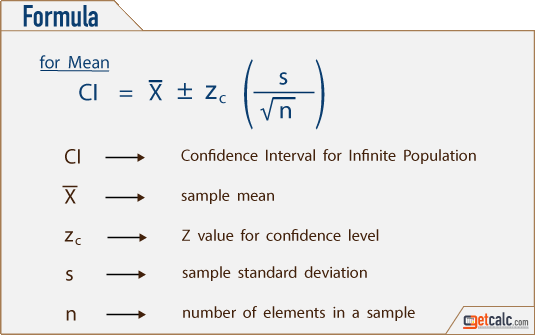

In [150]:
def get_prediction_interval(prediction, actual_values, predicted_values, pi=.95):
    '''
    Get a prediction interval for a linear regression.
    
    INPUTS: 
        - Single prediction, 
        - y_train
        - prediction from x_train,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single prediction
    '''
    
    #get standard deviation of y_test
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
    
    
    #generate prediction interval lower and upper bound cs_24
    lower, upper = prediction - interval, prediction + interval
    return lower, prediction, upper

In [239]:
## Plot and save confidence interval of linear regression  - 95% cs_24
lower_vet = []
upper_vet = []

for i in preds_las:
    lower, prediction, upper =  get_prediction_interval(i, y_train.values, las.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [240]:
lower_vet[:5]

[62.22470914945348,
 67.24323003615777,
 59.608610027793056,
 91.15654994585992,
 42.42653695793107]

In [241]:
upper_vet[:5]

[129.0291696117067,
 134.047690498411,
 126.41307049004627,
 157.96101040811314,
 109.23099742018428]

In [192]:
las = Lasso()
las.fit(x_train,y_train)
las.score(x_train,y_train)

0.8429018756107678

In [193]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train, las.predict(x_train))))

16.980853579421716


In [182]:
preds_las = las.predict(x_test)
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test,preds_las)))

12.033967635356841


In [183]:
preds_las

array([ 95.62693938, 100.64546027,  93.01084026, 124.55878018,
        75.82876719,  85.34125285,  82.60953658, 110.05193732,
        49.68312304,  50.21761905,  78.47089817,  70.0316573 ,
       122.06518755, 163.08629283,  74.72850828,  47.23083628,
       100.89809628,  81.0550663 ,  52.85852692,  86.96801575,
        69.13167504, 118.70060688,  67.77011097,  50.83547841,
       153.25340082,  49.49233813, 111.47330494, 132.17638004,
        47.86877438,  78.19572061,  80.6996446 ,  49.39289799,
        59.67572645, 114.79506478,  74.13541675,  59.29920523,
       160.60484797, 180.88692609,  81.51821759,  57.33024264,
        71.26823069, 104.70214797,  57.31180066,  87.72461339,
        52.25998822,  47.03412662,  66.03604344, 108.2136496 ,
       130.43381655,  91.15411146,  80.87608457, 173.98077384,
        62.8263666 ,  65.90801017, 185.56922645, 103.76663241,
        77.81410215, 130.59324495,  72.6082108 ,  93.54904448])

In [197]:
rid = Ridge()
rid.fit(x_train,y_train)
rid.score(x_train,y_train)

0.8589826704476355

In [76]:
preds_rid = rid.predict(x_test)
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test,preds_rid)))

12.70759395391315


In [171]:
# from statsmodels.sandbox.regression.predstd import wls_prediction_std
# prstd, iv_l, iv_u = wls_prediction_std(results)

In [170]:
np.std(las.predict(x_train))

38.94506360631491

In [169]:
np.std(lr.predict(x_train))

39.73285203083216

In [178]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train,las.predict(x_train))))

16.980853579421716


In [179]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train,lr.predict(x_train))))

16.02415718451723


In [185]:
las.predict(x_train)

array([ 66.92507447, 200.78686249, 186.1978163 , 167.32474808,
        70.40755672,  60.64762101, 170.13476112, 149.27544181,
        76.21740559,  91.13673939,  97.19762382, 145.48371155,
        69.65659948,  67.61470549,  60.97697189,  51.18773847,
       151.23295789, 104.80273269,  93.31342745,  66.65487418,
       114.3419476 , 206.83334075,  93.14875236, 136.13350001,
        59.8238072 , 199.54017604,  74.69454757,  54.25184601,
        62.68228885,  90.18603069,  85.37721436,  95.04386362,
        61.95397371,  45.58227445,  54.21418187,  48.56038243,
        45.46726697,  51.32550412,  98.81859798, 171.56369124,
        50.58178953,  59.79268425,  50.44612911,  56.66215166,
        81.40153784,  66.63824874,  92.52278913,  57.16621539,
        57.33660682,  54.87650537,  73.30110708,  74.57877392,
       104.66703962, 116.70521011,  53.2235414 ,  81.69775932,
        42.24292076,  50.60012101,  51.98895345, 129.38122028,
        75.22857429,  92.03266099,  93.24806239,  46.21

In [187]:
y_train

,Price in lakhs Cleaned
97,65.00
66,190.30
183,190.30
49,163.00
129,68.80
61,58.32
94,187.00
91,161.00
20,57.00
157,87.00
